In [160]:
import hashlib
import bcrypt
import time

# 1

In [161]:
target_hash = "d54cc1fe76f5186380a0939d2fc1723c44e8a5f7"

In [162]:
def letsgo(word,idx,now,result):
    if(idx < len(word)):
        letsgo(word, idx+1,now+word[idx].lower(),result)
        letsgo(word, idx+1,now+word[idx].upper(),result)
    else:
        result.append(now)

def generate_variants(word):
    result = []
    letsgo(word, 0, "", result)
    return result

In [163]:
found = False
with open("10k-most-common.txt", "r", encoding="utf-8") as f:
    words = [line.strip().lower() for line in f]
    for word in words:
        for variant in generate_variants(word):
            hashed = hashlib.sha1(variant.encode('utf-8')).hexdigest()
            if hashed == target_hash:
                print(f"Match found! Word: {word} Variant: {variant}")
                found = True
                break
if not found:
    print("No match found.")

Match found! Word: thailand Variant: ThaiLanD


## ANS: ThaiLanD

# 2

In [164]:
timeGiven = 1

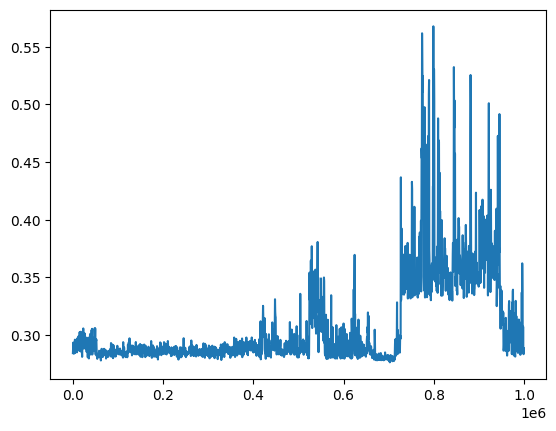

In [167]:
import matplotlib.pyplot as plt

tmp = ""
x = []
y=[]

for length in range(0, 1000000, 500):
    start = time.time()
    salt = bcrypt.gensalt()
    hashed = bcrypt.hashpw(tmp.encode('utf-8'), salt)
    end = time.time()
    x.append(length)
    y.append(end - start)
    tmp+= "b"

plt.plot(x, y)  


# 4
## ANS: Yes, but may take a long long time depending on password length

# 5
## ANS: No,bcrypt has a salt embedded in the hash, which prevents the use of rainbow tables — each hash must be brute-forced individually.